In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def prepare_data(df, forecast_col, forecast_out, test_size):
    df = df.copy()
    df['Label'] = df[forecast_col].shift(-forecast_out)
    df.dropna(inplace=True)
    
    X = np.array(df[forecast_col]).reshape(-1, 1)
    y = np.array(df['Label'])
    
    if len(X) != len(y):
        print(f"Error: Mismatched X and y lengths - X: {len(X)}, y: {len(y)}")
        return None

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    X_lately = X[-forecast_out:]
    
    response = [X_train, X_test, Y_train, Y_test, X_lately]
    
    return response

In [3]:
df = pd.read_csv("prizes.csv")

In [16]:
forecast_col = 'Close'
forecast_out = int(input("Forecast Horizon (days):"))
test_size = 0.2

Forecast Horizon (days):30


In [17]:
X_train,X_test,Y_train,Y_test, X_lately = prepare_data(df,forecast_col,forecast_out,test_size)
learner = LinearRegression()
learner.fit(X_train,Y_train)

LinearRegression()

In [18]:
score = learner.score(X_test,Y_test)
forecast = learner.predict(X_lately)
response = {}
response['test_score'] = score
response['forecast_set'] = forecast

Model Score: 57.65%
Forecast values:
Day 1: 97069.71653620695
Day 2: 100975.92329266333
Day 3: 99994.48111929413
Day 4: 101224.51353811569
Day 5: 101149.57077883295
Day 6: 103690.59010709744
Day 7: 105193.9993188539
Day 8: 105290.3020108424
Day 9: 99993.21231472996
Day 10: 97778.00585296049
Day 11: 98008.14033767636
Day 12: 97546.78572350973
Day 13: 95705.7301862599
Day 14: 95342.08960831672
Day 15: 98807.3109579084
Day 16: 99348.48017089933
Day 17: 96305.5033967793
Day 18: 94889.26402888034
Day 19: 95756.96542475763
Day 20: 94338.07981464465
Day 21: 93567.69890758023
Day 22: 94250.3400726566
Day 23: 95110.64556860193
Day 24: 97253.35865708903
Day 25: 98313.42119488737
Day 26: 98425.28241502875
Day 27: 98493.66392005968
Day 28: 101761.97121331983
Day 29: 97284.47570470968
Day 30: 95652.39153225816


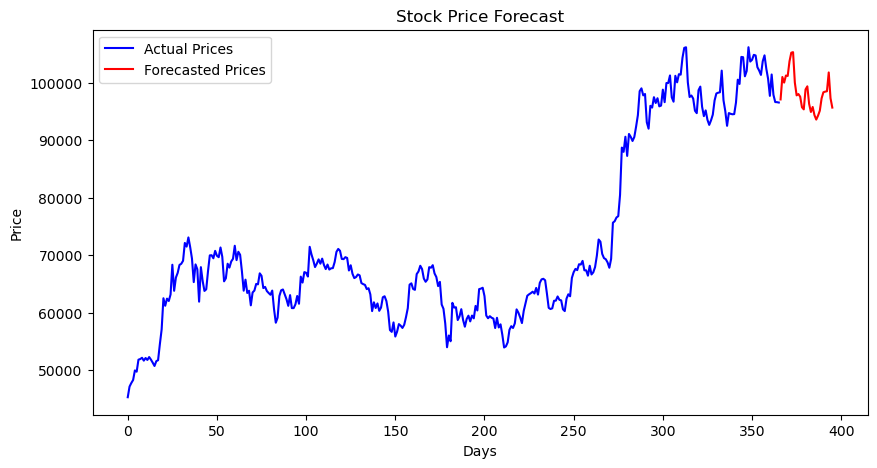

In [19]:
print(f"Model Score: {round(score * 100, 2)}%")
print("Forecast values:")
for i in range(len(forecast)):
    print(f"Day {i+1}: {forecast[i]}")

plt.figure(figsize=(10, 5))

plt.plot(df.index, df[forecast_col], label="Actual Prices", color="blue")

forecast_index = list(range(len(df), len(df) + forecast_out))

plt.plot(forecast_index, forecast, label="Forecasted Prices", color="red", linestyle="solid")

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price Forecast")
plt.legend()
plt.show()